### Salary

In [14]:
# Salary_hike -> Build a prediction model for Salary_hike

import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [4]:
salary=pd.read_csv("C:/Users/rayad/samatha assinments/simple linear regression/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### EDA

In [5]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


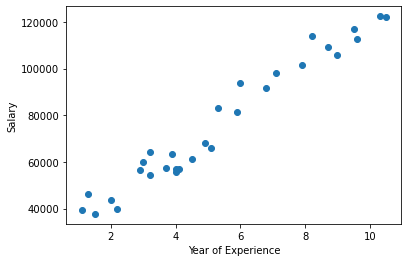

In [7]:
plt.scatter(x=salary["YearsExperience"],y=salary["Salary"])
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

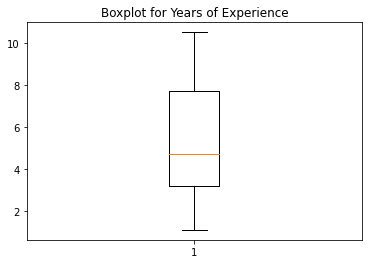

In [8]:
plt.boxplot(salary['YearsExperience'])
plt.title('Boxplot for Years of Experience')
plt.show()

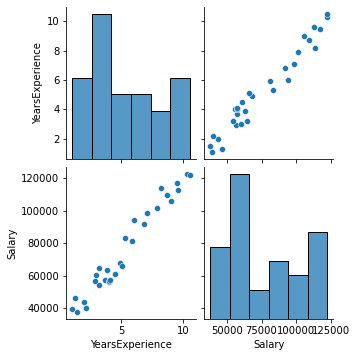

In [9]:
sns.pairplot(salary)

In [10]:
# from the above  graphs we can say that years experience and salary are corerelated
# corr() method is used to find correlation is high or not
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


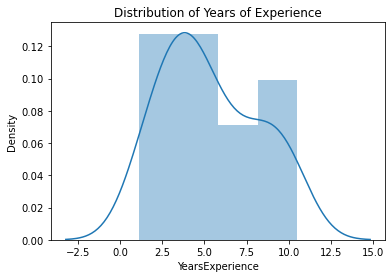

In [16]:
sns.distplot(salary['YearsExperience'])
plt.title('Distribution of Years of Experience')
plt.show()

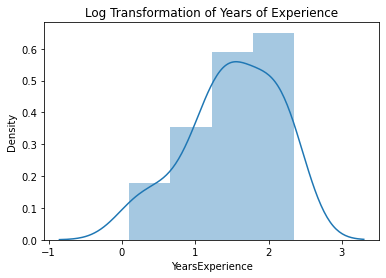

In [18]:
sns.distplot(np.log(salary['YearsExperience']))
plt.title('Log Transformation of Years of Experience')
plt.show()

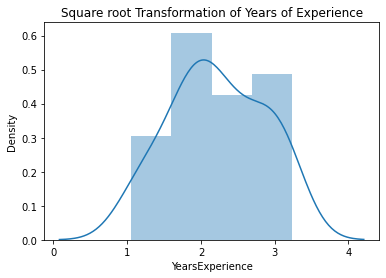

In [19]:
sns.distplot(np.sqrt(salary['YearsExperience']))
plt.title('Square root Transformation of Years of Experience')
plt.show()

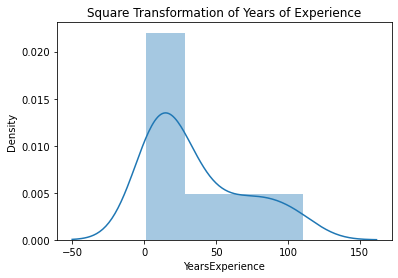

In [21]:
sns.distplot(np.square(salary['YearsExperience']))
plt.title('Square Transformation of Years of Experience')
plt.show()

#### Model Building

In [28]:
model=smf.ols('Salary~YearsExperience',data=salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        14:43:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Model with Log transformation
log_model=smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        14:46:35   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Model with Square transformation
square_model=smf.ols('Salary~np.square(YearsExperience)',data=salary).fit()
square_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.52e-16
Time:                        14:46:58   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Model with Square root transformation
sqrt_model=smf.ols('Salary~np.sqrt(YearsExperience)',data=salary).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        14:47:16   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Conclusion - Model is performing better without any transformations

In [33]:
new_data = pd.Series([9, 6, 5, 7])
new_df = pd.DataFrame(new_data, columns=['YearsExperience'])

In [34]:
new_df['Predictions'] = model.predict(new_df)
new_df

,YearsExperience,Predictions
0,9,110841.861092
1,6,82491.974127
2,5,73042.011806
3,7,91941.936449


### Delivery Time

In [37]:
# 1) Delivery_time -> Predict delivery time using sorting time 

import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset
delivery=pd.read_csv("C:/Users/rayad/samatha assinments/simple linear regression/delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### EDA

In [36]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


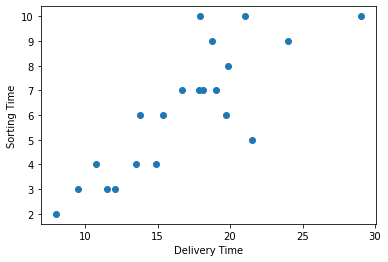

In [6]:
plt.scatter(x=delivery["Delivery Time"],y=delivery["Sorting Time"])
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

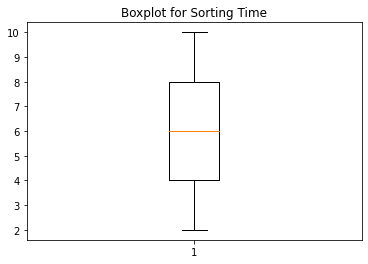

In [38]:
plt.boxplot(delivery['Sorting Time'])
plt.title('Boxplot for Sorting Time')
plt.show()

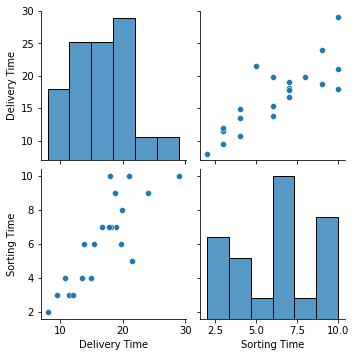

In [39]:
sns.pairplot(delivery)

In [40]:
# from the above  graphs we can say that years experience and salary are corerelated
# corr() method is used to find correlation is high or not
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [41]:
delivery.rename(columns={'Delivery Time': 'Delivery_time', 'Sorting Time': 'Sorting_time'}, inplace=True)

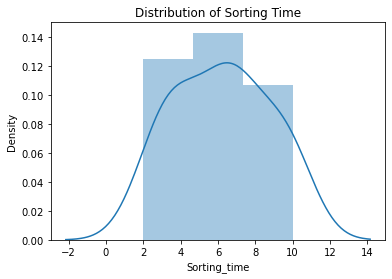

In [45]:
sns.distplot(delivery['Sorting_time'])
plt.title('Distribution of Sorting Time')
plt.show()

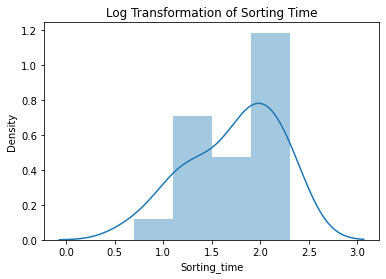

In [46]:
sns.distplot(np.log(delivery['Sorting_time']))
plt.title('Log Transformation of Sorting Time')
plt.show()

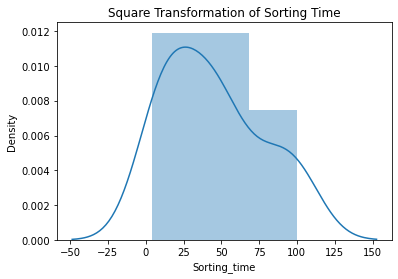

In [48]:
sns.distplot(np.square(delivery['Sorting_time']))
plt.title('Square Transformation of Sorting Time')
plt.show()

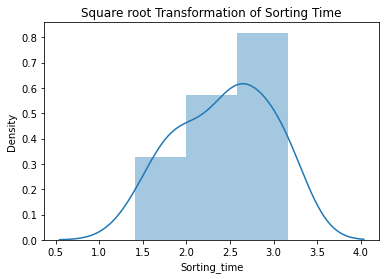

In [49]:
sns.distplot(np.sqrt(delivery['Sorting_time']))
plt.title('Square root Transformation of Sorting Time')
plt.show()

#### Model Building

In [11]:
model=smf.ols('Delivery_time~Sorting_time',data=delivery).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        12:36:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
delivery['log_sort']=np.log(delivery['Sorting_time'])

In [15]:
new_df = delivery[['log_sort', 'Delivery_time']]

In [17]:
model=smf.ols('Delivery_time~log_sort',data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        12:42:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_sort       9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
delivery['sqrt_sort']=np.sqrt(delivery['Sorting_time'])
delivery.head()

,Delivery_time,Sorting_time,log_sort,sqrt_sort
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


In [22]:
new_df1 = delivery[['sqrt_sort', 'Delivery_time']]
new_df1.head()

,sqrt_sort,Delivery_time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00


In [20]:
model=smf.ols('Delivery_time~sqrt_sort',data=new_df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        12:48:20   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sort      7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""